In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [9]:
# Cifar-10 input 32*32*3 (color image of 32x32 pixels) = 3072 pixels
x_train = x_train.reshape(50000, 3072)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 3072)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [10]:
input_img = Input(shape=(3072,))
# encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1)
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(3072, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 300 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.6612 - val_loss: 0.6372
Epoch 2/50
50000/50000 [==============================] - 3s 60us/sample - loss: 0.6389 - val_loss: 0.6306
Epoch 3/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.6375 - val_loss: 0.6297
Epoch 4/50
50000/50000 [==============================] - 3s 57us/sample - loss: 0.6371 - val_loss: 0.6290
Epoch 5/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.6368 - val_loss: 0.6288
Epoch 6/50
50000/50000 [==============================] - 3s 57us/sample - loss: 0.6366 - val_loss: 0.6291
Epoch 7/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6364 - val_loss: 0.6303
Epoch 8/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6364 - val_loss: 0.6282
Epoch 9/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6340 - val_lo

In [13]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [14]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

C:\Users\Laboratory\anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


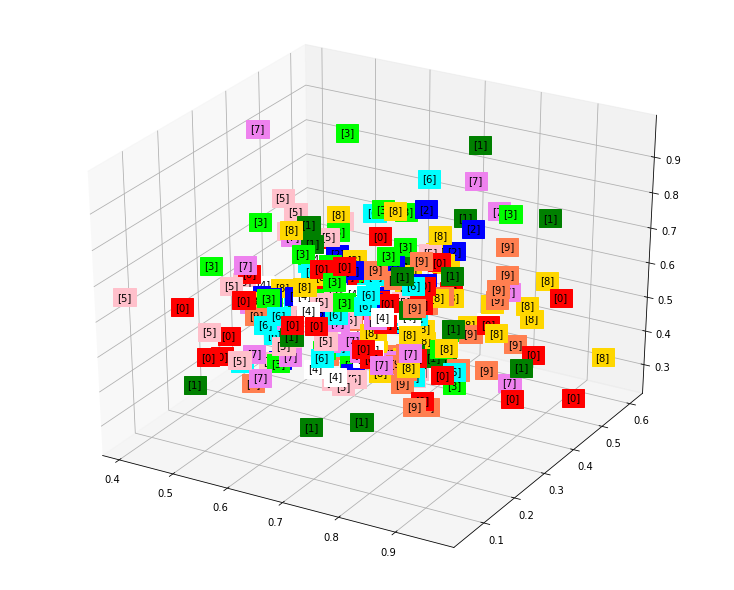

In [15]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

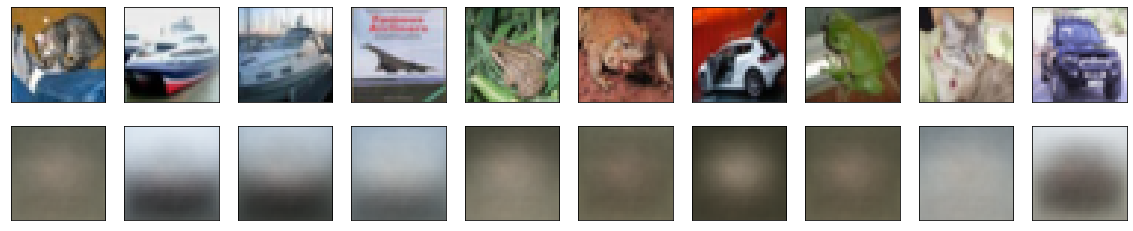

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()